<a href="https://www.kaggle.com/code/loananh/macd-ema-combined-strategy?scriptVersionId=226935092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Prepare Python Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#Load Dataframe
data = pd.read_csv('/kaggle/input/hose-market/CafeF.HSX.Upto07.03.2025.csv')

# Rename column <DTYYYYMMDD> to Date
data.rename(columns={'<DTYYYYMMDD>': '<Date>'}, inplace=True)

# Convert <DTYYYYMMDD> from number to date format
data['<Date>'] = pd.to_datetime(data['<Date>'], format='%Y%m%d')

# Filter Stock Data for Analytics (SSI Stock in 15 years)
start_date = datetime.now()
end_date = datetime(start_date.year-15, start_date.month, start_date.day)
df = data[(data['<Ticker>']=='SSI') & (data['<Date>'] >= end_date) & (data['<Date>'] <= start_date)]

# Sort date and index in ascending
df = df.iloc[::-1]
df = df.reset_index(drop = True, inplace = False)

print(df.head())
print(df.tail())

  <Ticker>     <Date>  <Open>  <High>   <Low>  <Close>  <Volume>
0      SSI 2010-03-11  8.7676  8.8153  8.6247   8.6785   1901090
1      SSI 2010-03-12  8.7200  8.7200  8.6247   8.7262   1512500
2      SSI 2010-03-15  8.7676  8.8153  8.6247   8.6785   1482010
3      SSI 2010-03-16  8.7200  8.7200  8.3864   8.4877   3235630
4      SSI 2010-03-17  8.5770  8.5770  8.3864   8.3924   1911440
     <Ticker>     <Date>  <Open>  <High>  <Low>  <Close>  <Volume>
3735      SSI 2025-03-03   26.30   26.80  26.15    26.60  25645100
3736      SSI 2025-03-04   26.45   26.60  26.10    26.35  24072400
3737      SSI 2025-03-05   26.40   26.65  26.10    26.10  27564200
3738      SSI 2025-03-06   26.20   26.95  26.20    26.90  44988800
3739      SSI 2025-03-07   27.10   27.15  26.80    26.90  22896800


In [2]:
#Get the duration of data set
print("Starting date: ",df.iloc[0]['<Date>'])
print("Ending date: ", df.iloc[-1]['<Date>'])
print("Duration: ", df.iloc[-1]['<Date>'] - df.iloc[0]['<Date>'])

Starting date:  2010-03-11 00:00:00
Ending date:  2025-03-07 00:00:00
Duration:  5475 days 00:00:00


In [3]:
# Calculate MACD and EMA
df['EMA_12'] = df['<Close>'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['<Close>'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Trading signals
df['Buy_Signal'] = np.where((df['MACD'] > df['Signal_Line']) & (df['MACD'].shift(1) <= df['Signal_Line'].shift(1)), 1, 0)
df['Sell_Signal'] = np.where((df['MACD'] < df['Signal_Line']) & (df['MACD'].shift(1) >= df['Signal_Line'].shift(1)), 1, 0)

# Initial capital
initial_capital = 2000
capital = initial_capital
position = 0
stop_loss = 0.03  # 3% stop loss
take_profit = 0.07  # 7% take profit

for i in range(1, len(df)):
    if df['Buy_Signal'][i] == 1 and position == 0:
        position = capital / df['<Close>'][i]
        capital -= position * df['<Close>'][i]
        print(f"Buy at {df['<Close>'][i]} on {df['<Date>'][i]}")
    elif df['Sell_Signal'][i] == 1 and position > 0:
        capital += position * df['<Close>'][i]
        position = 0
        print(f"Sell at {df['<Close>'][i]} on {df['<Date>'][i]}")
        
# Check for stop loss or take profit
    if position > 0:
        if df['<Close>'][i] <= df['<Close>'][i-1] * (1 - stop_loss):
            capital += position * df['<Close>'][i]
            position = 0
            print(f"Stop loss triggered at {df['<Close>'][i]} on {df['<Date>'][i]}")
        elif df['<Close>'][i] >= df['<Close>'][i-1] * (1 + take_profit):
            capital += position * df['<Close>'][i]
            position = 0
            print(f"Take profit triggered at {df['<Close>'][i]} on {df['<Date>'][i]}")
# Final capital
capital += position * df['<Close>'][0]
print(f"Final capital: {capital}")

# Return on investment
roi = ((capital - initial_capital) / initial_capital) * 100
print(f"Return on Investment (ROI): {roi:.2f}%")

Buy at 8.7262 on 2010-03-12 00:00:00
Sell at 8.4877 on 2010-03-16 00:00:00
Buy at 8.8311 on 2010-03-26 00:00:00
Sell at 8.297 on 2010-03-30 00:00:00
Buy at 8.4305 on 2010-04-22 00:00:00
Sell at 8.1063 on 2010-05-07 00:00:00
Buy at 7.3657 on 2010-05-28 00:00:00
Sell at 6.5731 on 2010-07-02 00:00:00
Buy at 6.7084 on 2010-07-13 00:00:00
Sell at 6.3024 on 2010-07-28 00:00:00
Buy at 6.3411 on 2010-07-30 00:00:00
Sell at 6.2444 on 2010-08-02 00:00:00
Buy at 5.4131 on 2010-08-31 00:00:00
Stop loss triggered at 5.3358 on 2010-09-10 00:00:00
Buy at 5.2198 on 2010-10-06 00:00:00
Sell at 5.0651 on 2010-10-11 00:00:00
Buy at 4.7752 on 2010-10-29 00:00:00
Sell at 4.5432 on 2010-11-03 00:00:00
Buy at 4.7752 on 2010-11-05 00:00:00
Sell at 4.4078 on 2010-11-15 00:00:00
Buy at 4.3498 on 2010-11-26 00:00:00
Stop loss triggered at 5.4711 on 2010-12-07 00:00:00
Buy at 6.2831 on 2010-12-28 00:00:00
Sell at 6.2058 on 2010-12-29 00:00:00
Buy at 4.5818 on 2011-03-14 00:00:00
Stop loss triggered at 4.5818 on 2

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


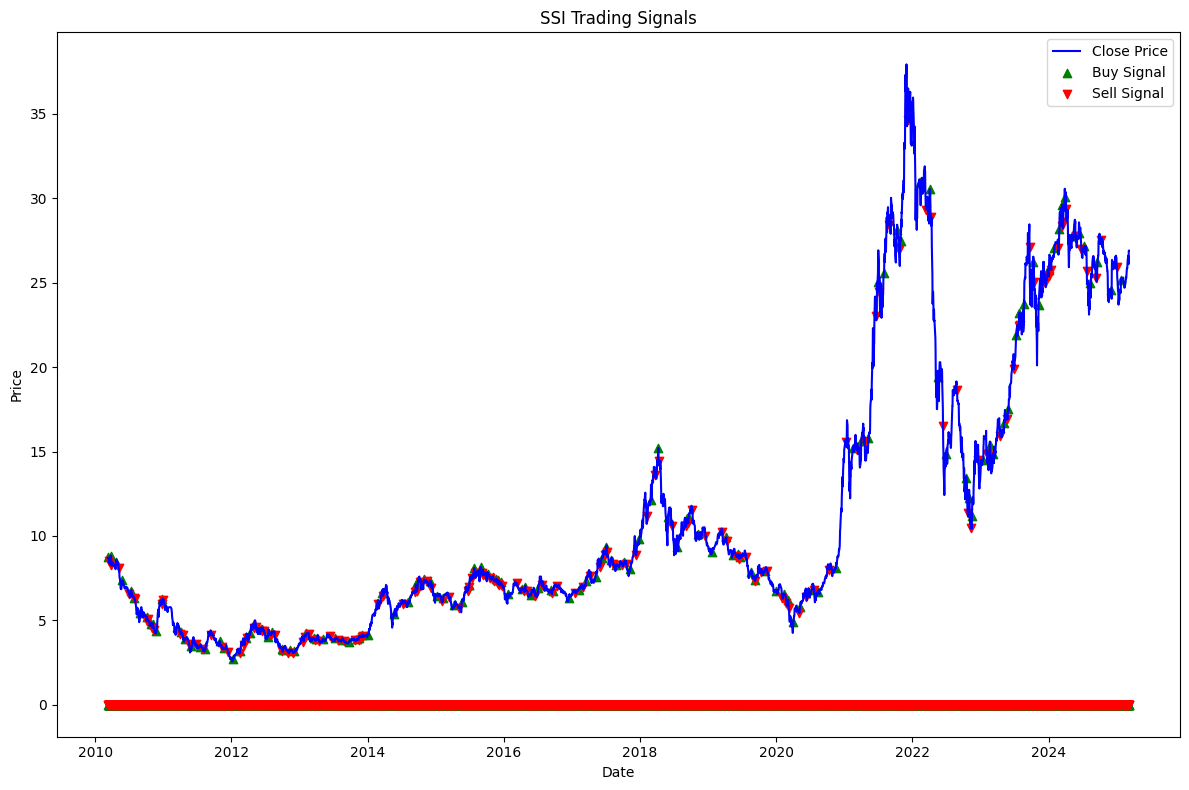

In [4]:
# Plotting
plt.figure(figsize=(12,8))

# Price and Buy/Sell signals
plt.plot(df['<Date>'], df['<Close>'], label='Close Price', color='blue')
plt.scatter(df['<Date>'], df['Buy_Signal'] * df['<Close>'], label='Buy Signal', marker='^', color='green')
plt.scatter(df['<Date>'], df['Sell_Signal'] * df['<Close>'], label='Sell Signal', marker='v', color='red')
plt.title('SSI Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()